In [2]:
import pandas as pd
import torch
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
# help(load_digits)
df=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
df['target']=load_iris().target
X=df.iloc[:,:4]
y=df["target"]
pd.DataFrame(X,y)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.1,3.5,1.4,0.2
0,5.1,3.5,1.4,0.2
0,5.1,3.5,1.4,0.2
0,5.1,3.5,1.4,0.2
0,5.1,3.5,1.4,0.2
...,...,...,...,...
2,4.7,3.2,1.3,0.2
2,4.7,3.2,1.3,0.2
2,4.7,3.2,1.3,0.2


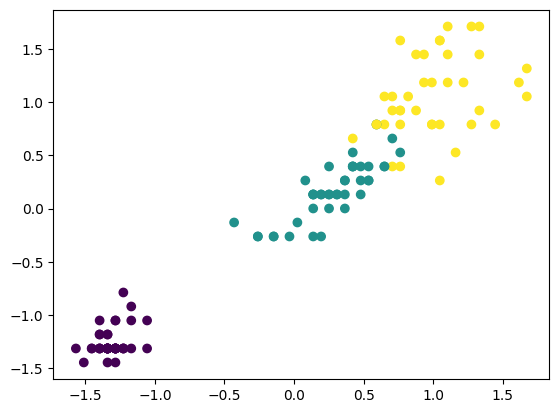

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X_train[:,2],X_train[:,3],c=y_train)


In [18]:
class LinearClassification(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.fc=nn.Linear(4,64,bias=True)
    self.out=nn.Linear(64,3,bias=True)
    self.relu=nn.ReLU()

  def forward(self,x):
    x=self.fc(x)
    x=self.relu(x)
    x=self.out(x)
    return x
# X.shape[1]

In [19]:
model=LinearClassification(input_size=X_train.shape[1],output_size=3)

In [20]:
critirion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [22]:
  epochs=20
  for epoch in range(epochs):
    y_pred=model(torch.tensor(X_train).float())
    loss=critirion(y_pred,torch.tensor(y_train.values).long())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/20, Loss: 1.0489
Epoch 2/20, Loss: 0.8968
Epoch 3/20, Loss: 0.7711
Epoch 4/20, Loss: 0.6688
Epoch 5/20, Loss: 0.5858
Epoch 6/20, Loss: 0.5181
Epoch 7/20, Loss: 0.4629
Epoch 8/20, Loss: 0.4174
Epoch 9/20, Loss: 0.3800
Epoch 10/20, Loss: 0.3494
Epoch 11/20, Loss: 0.3244
Epoch 12/20, Loss: 0.3038
Epoch 13/20, Loss: 0.2861
Epoch 14/20, Loss: 0.2704
Epoch 15/20, Loss: 0.2558
Epoch 16/20, Loss: 0.2419
Epoch 17/20, Loss: 0.2289
Epoch 18/20, Loss: 0.2167
Epoch 19/20, Loss: 0.2051
Epoch 20/20, Loss: 0.1942


In [23]:
with torch.no_grad():
  y_pred_test=model(torch.tensor(X_test).float())
  loss=critirion(y_pred_test,torch.tensor(y_test.values).long())
  print(f'Test Loss: {loss.item():.4f}')

Test Loss: 0.1321
